## 1.Import Libraries

In [1]:
#Import Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from __future__ import division, print_function
sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy.contrasts import Sum
import warnings
warnings.filterwarnings('ignore')
from matplotlib import colors
from matplotlib.colors import ListedColormap
import matplotlib
from matplotlib import colors


In [2]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

## 2.Cojoint Analysis 

In [3]:
conjoint_dat = pd.read_csv('Potato_chips_flavour.csv')

In [4]:
conjoint_dat.head()

,Unnamed: 0,flavor,price,weight,fat_free,sodium_free,gluten_free,organic,multipack,ranking
0,1,cheese_onion,1.0,100g,NO,NO,NO,NO,NO,11
1,2,salt_vinegar,3.0,100g,NO,YES,YES,YES,NO,12
2,3,chicken_flavored,4.0,200g,NO,NO,NO,YES,NO,9
3,4,salt_vinegar,4.0,400g,YES,YES,NO,NO,NO,2
4,5,salt_vinegar,2.0,300g,NO,NO,NO,YES,YES,8


In [5]:
conjoint_dat.drop("Unnamed: 0", axis='columns', inplace = True)

In [6]:
conjoint_dat.head()

,flavor,price,weight,fat_free,sodium_free,gluten_free,organic,multipack,ranking
0,cheese_onion,1.0,100g,NO,NO,NO,NO,NO,11
1,salt_vinegar,3.0,100g,NO,YES,YES,YES,NO,12
2,chicken_flavored,4.0,200g,NO,NO,NO,YES,NO,9
3,salt_vinegar,4.0,400g,YES,YES,NO,NO,NO,2
4,salt_vinegar,2.0,300g,NO,NO,NO,YES,YES,8


In [7]:
conjoint_dat_dum = pd.get_dummies(conjoint_dat.iloc[:,:-1], columns=conjoint_dat.iloc[:,:-1].columns)
conjoint_dat_dum.head()

,flavor_cheese_onion,flavor_chicken_flavored,flavor_salt_vinegar,flavor_tomato_ketchup,price_1.0,price_2.0,price_3.0,price_4.0,weight_100g,weight_200g,...,fat_free_NO,fat_free_YES,sodium_free_NO,sodium_free_YES,gluten_free_NO,gluten_free_YES,organic_NO,organic_YES,multipack_NO,multipack_YES
0,1,0,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,1,0
2,0,1,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,0,1,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,1,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1


### 2.1 Run Linear Regression To Identify Features that Have the Most Impact on Ranking 

In [8]:
main_effects_model_fit = sm.OLS(conjoint_dat['ranking'].astype(int), sm.add_constant(conjoint_dat_dum))
result = main_effects_model_fit.fit()
result.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Fri, 17 Feb 2023   Prob (F-statistic):             0.0794
Time:                        17:15:11   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.0000      0.029     68.000      0.009       1.626       2.374
flavor_cheese_onion         0.5000      0.217      2.308      0.260      -2.253       3.253
flavor_chicken_flavored     0.5000      0.217      2.308      0.260      -2.253       3.253
flavor_salt_vinegar         0.7500      0.217      3.462      0.179      -2.003       3.503
flavor_tomato_ketchup       0.2500      0.217      1.154      0.455      -2.503       3.003
price_1.0                   1.2500      0.217      5.770      0.109      -1.503       4.003
price_2.0                   0.5000      0.217      2.308      0.260      -2.253       3.253
price_3.0                   0.5000      0.217      2.308      0.260      -2.253       3.253
price_4.0                  -0.2500      0.217     -1.154      0.455      -3.003       2.503
weight_100g                 5.5000      0.217     25.389      0.025       2.747       8.253
weight_200g                 2.5000      0.217     11.540      0.055      -0.253       5.253
weight_300g                -0.7500      0.217     -3.462      0.179      -3.503       2.003
weight_400g                -5.2500      0.217    -24.235      0.026      -8.003      -2.497
fat_free_NO                -0.7500      0.126     -5.959      0.106      -2.349       0.849
fat_free_YES                2.7500      0.126     21.849      0.029       1.151       4.349
sodium_free_NO              1.2500      0.126      9.932      0.064      -0.349       2.849
sodium_free_YES             0.7500      0.126      5.959      0.106      -0.849       2.349
gluten_free_NO              1.2500      0.126      9.932      0.064      -0.349       2.849
gluten_free_YES             0.7500      0.126      5.959      0.106      -0.849       2.349
organic_NO                 -0.1250      0.126     -0.993      0.502      -1.724       1.474
organic_YES                 2.1250      0.126     16.884      0.038       0.526       3.724
multipack_NO                0.2500      0.126      1.986      0.297      -1.349       1.849
multipack_YES               1.7500      0.126     13.904      0.046       0.151       3.349
==============================================================================
Omnibus:                       29.718   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                2.667
Skew:                           0.000   Prob(JB):                        0.264
Kurtosis:                       1.000   Cond. No.                     1.66e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The smallest eigenvalue is 2.47e-31. This might ind

In [9]:
data_res = pd.DataFrame({'name': result.params.keys(),
                         'weight': result.params.values,
                         'p_val': result.pvalues})
data_res = data_res[1:]
data_res
     

,name,weight,p_val
flavor_cheese_onion,flavor_cheese_onion,0.500,0.260281
flavor_chicken_flavored,flavor_chicken_flavored,0.500,0.260281
flavor_salt_vinegar,flavor_salt_vinegar,0.750,0.179010
flavor_tomato_ketchup,flavor_tomato_ketchup,0.250,0.454553
price_1.0,price_1.0,1.250,0.109244
price_2.0,price_2.0,0.500,0.260281
price_3.0,price_3.0,0.500,0.260281
price_4.0,price_4.0,-0.250,0.454553
weight_100g,weight_100g,5.500,0.025062
weight_200g,weight_200g,2.500,0.055027


In [10]:
# If the significance level is 5%, it can be seen that all the factors are not statistically significant.
# data_res['abs_weight'] = np.abs(data_res['weight'])
data_res = data_res.sort_values(by='weight')
data_res
     

,name,weight,p_val
weight_400g,weight_400g,-5.250,0.026254
weight_300g,weight_300g,-0.750,0.179010
fat_free_NO,fat_free_NO,-0.750,0.105849
price_4.0,price_4.0,-0.250,0.454553
organic_NO,organic_NO,-0.125,0.502188
flavor_tomato_ketchup,flavor_tomato_ketchup,0.250,0.454553
multipack_NO,multipack_NO,0.250,0.296921
flavor_chicken_flavored,flavor_chicken_flavored,0.500,0.260281
price_2.0,price_2.0,0.500,0.260281
flavor_cheese_onion,flavor_cheese_onion,0.500,0.260281


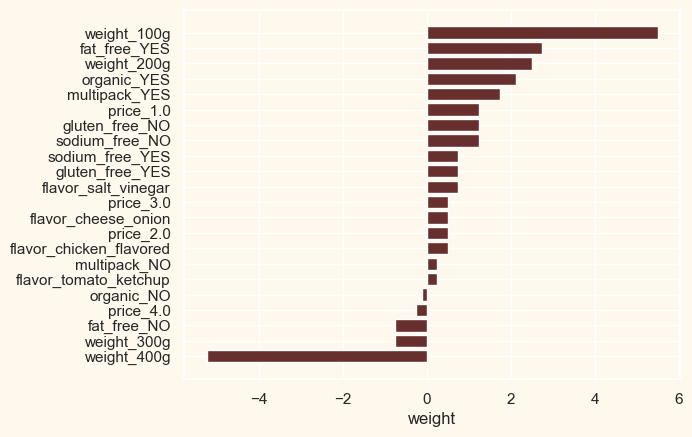

In [11]:
xbar = np.arange(len(data_res['weight']))
plt.barh(xbar, data_res['weight'], color = "#682F2F")
plt.yticks(xbar, labels=data_res['name'])
plt.xlabel('weight')
plt.show()

In this case, it can be seen that there are factors that are positively related such as weight 100gms, and the option of the product to be fat free. While other factors like Weight_400g, 300g and No Fat free are negatively related.

In [12]:
from sklearn.preprocessing import StandardScaler

# We will use the data frame where we had created dummy variables scaling all the variables to a range of 0 to 1
X = conjoint_dat_dum
y = conjoint_dat['ranking'].astype(int)
# The target variable will be normalized from a ranking to a 1 to 10 score
y = y.apply(lambda x: int(x/len(y)*10))

features = X.columns.values
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features  

In [13]:
X.head()

,flavor_cheese_onion,flavor_chicken_flavored,flavor_salt_vinegar,flavor_tomato_ketchup,price_1.0,price_2.0,price_3.0,price_4.0,weight_100g,weight_200g,...,fat_free_NO,fat_free_YES,sodium_free_NO,sodium_free_YES,gluten_free_NO,gluten_free_YES,organic_NO,organic_YES,multipack_NO,multipack_YES
0,1.732051,-0.577350,-0.577350,-0.57735,1.732051,-0.577350,-0.577350,-0.577350,1.732051,-0.577350,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
1,-0.577350,-0.577350,1.732051,-0.57735,-0.577350,-0.577350,1.732051,-0.577350,1.732051,-0.577350,...,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0
2,-0.577350,1.732051,-0.577350,-0.57735,-0.577350,-0.577350,-0.577350,1.732051,-0.577350,1.732051,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
3,-0.577350,-0.577350,1.732051,-0.57735,-0.577350,-0.577350,-0.577350,1.732051,-0.577350,-0.577350,...,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
4,-0.577350,-0.577350,1.732051,-0.57735,-0.577350,1.732051,-0.577350,-0.577350,-0.577350,-0.577350,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0


## 3. Perform Ordinial Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

# Running logistic regression model
model = LogisticRegression()
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
# Print the prediction accuracy
print(metrics.mean_squared_error(y_test, prediction_test))

10.125


### Identifying Consumer Preferences that are Positive

AxesSubplot(0.125,0.11;0.775x0.77)


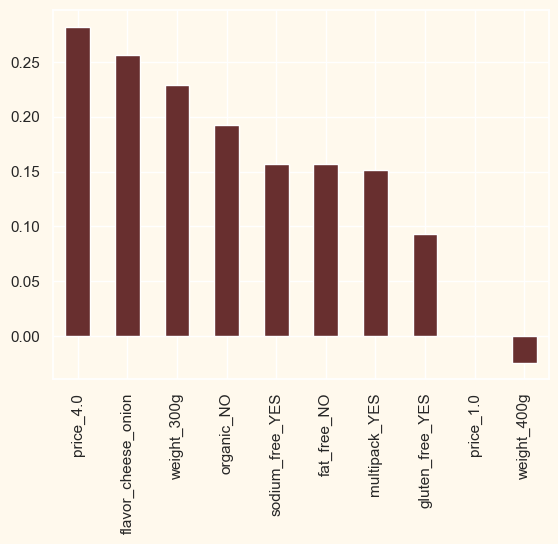

In [15]:
# Get weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print(weights.sort_values(ascending = False)[:10].plot(kind='bar',color = '#682F2F'))

We can see that first 10 variables ('Features') that Model has identified are positively related to the score

### Identifying Consumer Preferences that are Negative

AxesSubplot(0.125,0.11;0.775x0.77)


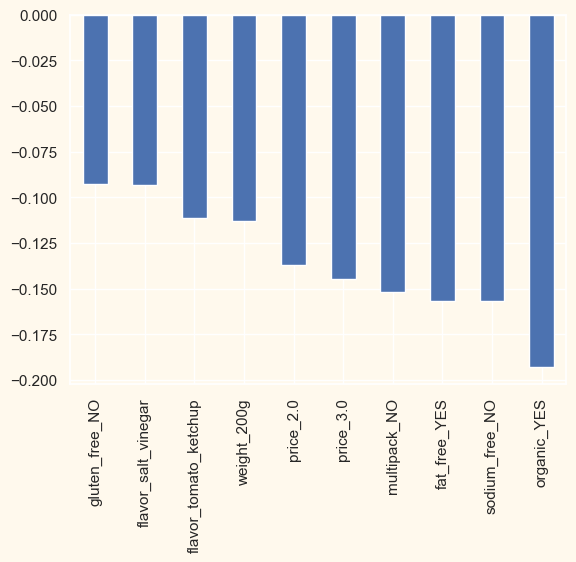

In [16]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

## 4. Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.mean_squared_error(y_test, prediction_test))

10.125


### 4.1 Most Significant Features

<AxesSubplot: >

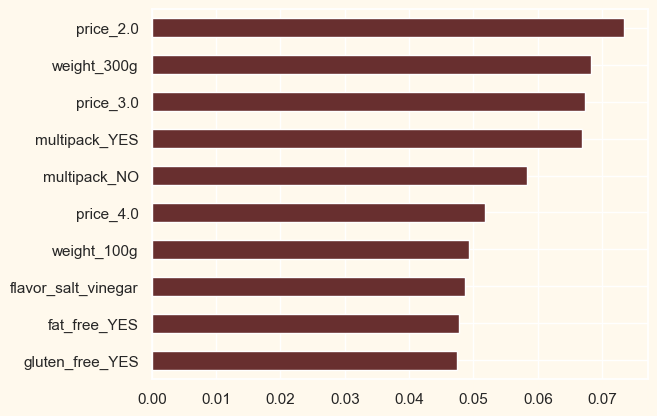

In [18]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh', color = '#682F2F')